In [0]:
import mxnet as mx
from mxnet import nd, autograd

ctx = mx.gpu()

##Reading the data from text file

In [0]:
with open('text.txt') as file:
    text = file.read()

print(text)

Artificial intelligence (AI) is the simulation of human intelligence processes by machines, especially computer systems. These processes include learning (the acquisition of information and rules for using the information), reasoning (using rules to reach approximate or definite conclusions) and self-correction.
Particular applications of AI include expert systems, speech recognition and machine vision. Artificial intelligence (AI), the ability of a digital computer or computer-controlled robot to perform tasks commonly associated with intelligent beings. The term is frequently applied to the project of developing systems endowed with the intellectual processes characteristic of humans, such as the ability to reason, discover meaning, generalize, or learn from past experience. Since the development of the digital computer in the 1940s, it has been demonstrated that computers can be programmed to carry out very complex tasks—as, for example, discovering proofs for mathematical theorems 

In [0]:
characters = list(set(text))
vocab_length = len(characters)
print(characters)
print(f'Number of unique characters: {vocab_length}')

['S', 'n', 'p', 's', 'e', ' ', 'm', 'U', 'z', '.', 'r', 'a', 'q', 'D', '1', '-', 'i', '(', 'R', 'N', 'y', 'c', 'l', 'C', 'f', 'M', 'B', '4', 'W', '“', ';', '9', 'P', 'v', 'o', 'b', ',', 'h', 'V', 'G', '—', 'O', '\n', 'u', "'", 't', 'd', 'k', ':', 'g', 'K', '”', 'é', 'I', 'F', '’', 'A', '0', 'E', 'j', 'L', ')', '?', 'H', 'x', 'T', 'w']
Number of unique characters: 67


In [0]:
char_to_int = dict([(char, i) for i, char in enumerate(characters)])
char_to_int

{'\n': 42,
 ' ': 5,
 "'": 44,
 '(': 17,
 ')': 61,
 ',': 36,
 '-': 15,
 '.': 9,
 '0': 57,
 '1': 14,
 '4': 27,
 '9': 31,
 ':': 48,
 ';': 30,
 '?': 62,
 'A': 56,
 'B': 26,
 'C': 23,
 'D': 13,
 'E': 58,
 'F': 54,
 'G': 39,
 'H': 63,
 'I': 53,
 'K': 50,
 'L': 60,
 'M': 25,
 'N': 19,
 'O': 41,
 'P': 32,
 'R': 18,
 'S': 0,
 'T': 65,
 'U': 7,
 'V': 38,
 'W': 28,
 'a': 11,
 'b': 35,
 'c': 21,
 'd': 46,
 'e': 4,
 'f': 24,
 'g': 49,
 'h': 37,
 'i': 16,
 'j': 59,
 'k': 47,
 'l': 22,
 'm': 6,
 'n': 1,
 'o': 34,
 'p': 2,
 'q': 12,
 'r': 10,
 's': 3,
 't': 45,
 'u': 43,
 'v': 33,
 'w': 66,
 'x': 64,
 'y': 20,
 'z': 8,
 'é': 52,
 '—': 40,
 '’': 55,
 '“': 29,
 '”': 51}

In [0]:
int_to_char = dict([(i, char) for i, char in enumerate(characters)])
int_to_char

{0: 'S',
 1: 'n',
 2: 'p',
 3: 's',
 4: 'e',
 5: ' ',
 6: 'm',
 7: 'U',
 8: 'z',
 9: '.',
 10: 'r',
 11: 'a',
 12: 'q',
 13: 'D',
 14: '1',
 15: '-',
 16: 'i',
 17: '(',
 18: 'R',
 19: 'N',
 20: 'y',
 21: 'c',
 22: 'l',
 23: 'C',
 24: 'f',
 25: 'M',
 26: 'B',
 27: '4',
 28: 'W',
 29: '“',
 30: ';',
 31: '9',
 32: 'P',
 33: 'v',
 34: 'o',
 35: 'b',
 36: ',',
 37: 'h',
 38: 'V',
 39: 'G',
 40: '—',
 41: 'O',
 42: '\n',
 43: 'u',
 44: "'",
 45: 't',
 46: 'd',
 47: 'k',
 48: ':',
 49: 'g',
 50: 'K',
 51: '”',
 52: 'é',
 53: 'I',
 54: 'F',
 55: '’',
 56: 'A',
 57: '0',
 58: 'E',
 59: 'j',
 60: 'L',
 61: ')',
 62: '?',
 63: 'H',
 64: 'x',
 65: 'T',
 66: 'w'}

In [0]:
int_text = [char_to_int[char] for char in text]
int_text

[56,
 10,
 45,
 16,
 24,
 16,
 21,
 16,
 11,
 22,
 5,
 16,
 1,
 45,
 4,
 22,
 22,
 16,
 49,
 4,
 1,
 21,
 4,
 5,
 17,
 56,
 53,
 61,
 5,
 16,
 3,
 5,
 45,
 37,
 4,
 5,
 3,
 16,
 6,
 43,
 22,
 11,
 45,
 16,
 34,
 1,
 5,
 34,
 24,
 5,
 37,
 43,
 6,
 11,
 1,
 5,
 16,
 1,
 45,
 4,
 22,
 22,
 16,
 49,
 4,
 1,
 21,
 4,
 5,
 2,
 10,
 34,
 21,
 4,
 3,
 3,
 4,
 3,
 5,
 35,
 20,
 5,
 6,
 11,
 21,
 37,
 16,
 1,
 4,
 3,
 36,
 5,
 4,
 3,
 2,
 4,
 21,
 16,
 11,
 22,
 22,
 20,
 5,
 21,
 34,
 6,
 2,
 43,
 45,
 4,
 10,
 5,
 3,
 20,
 3,
 45,
 4,
 6,
 3,
 9,
 5,
 65,
 37,
 4,
 3,
 4,
 5,
 2,
 10,
 34,
 21,
 4,
 3,
 3,
 4,
 3,
 5,
 16,
 1,
 21,
 22,
 43,
 46,
 4,
 5,
 22,
 4,
 11,
 10,
 1,
 16,
 1,
 49,
 5,
 17,
 45,
 37,
 4,
 5,
 11,
 21,
 12,
 43,
 16,
 3,
 16,
 45,
 16,
 34,
 1,
 5,
 34,
 24,
 5,
 16,
 1,
 24,
 34,
 10,
 6,
 11,
 45,
 16,
 34,
 1,
 5,
 11,
 1,
 46,
 5,
 10,
 43,
 22,
 4,
 3,
 5,
 24,
 34,
 10,
 5,
 43,
 3,
 16,
 1,
 49,
 5,
 45,
 37,
 4,
 5,
 16,
 1,
 24,
 34,
 10,
 6,
 11,
 45,
 16,
 

In [0]:
print(f'Total sequence length of the text: {len(int_text)}')
print(f'First 20 integers: {int_text[:20]}')
print(f'First 20 characters: {"".join([int_to_char[i] for i in int_text[:20]])}')

Total sequence length of the text: 9792
First 20 integers: [56, 10, 45, 16, 24, 16, 21, 16, 11, 22, 5, 16, 1, 45, 4, 22, 22, 16, 49, 4]
First 20 characters: Artificial intellige


In [0]:
def one_hot(ints, vocab_length = vocab_length):
    outputs = nd.zeros((len(ints), vocab_length))
    for i, idx in enumerate(ints):
        outputs[i, idx] = 1.0
    return outputs

In [0]:
print('Before one hot:')
print(int_text[:20])
print('After one hot:')
print(one_hot(int_text[:20]))

Before one hot:
[56, 10, 45, 16, 24, 16, 21, 16, 11, 22, 5, 16, 1, 45, 4, 22, 22, 16, 49, 4]
After one hot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<NDArray 20x67 @cpu(0)>


In [0]:
def onehot_to_text(embeddings):
    outputs = ""
    ints = nd.argmax(embeddings, axis = 1).asnumpy()
    for i in ints:
        outputs += int_to_char[i]
    return outputs

In [0]:
onehot = one_hot(int_text[:20])
print('First 20 characters in Onehot:')
print(onehot)
print('\nAfter converting First 20 one hot embeddings to text:')
print(f'"{onehot_to_text(onehot)}"')

First 20 characters in Onehot:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<NDArray 20x67 @cpu(0)>

After converting First 20 one hot embeddings to text:
"Artificial intellige"


##Building the dataset

In [0]:
seq_length = 32
num_samples = (len(int_text) - 1)//seq_length
dataset = one_hot(int_text[: seq_length * num_samples]).reshape((num_samples, seq_length, vocab_length))
dataset.shape

(305, 32, 67)

In [0]:
output = onehot_to_text(dataset[0])
print(output)
print(f'Sequence length: {len(output)}')

Artificial intelligence (AI) is 
Sequence length: 32


In [0]:
batch_size = 8
batches = dataset.shape[0] // batch_size
print(f'Number of samples in dataset: {dataset.shape[0]}')
print(f'Number of batches: {batches}')

Number of samples in dataset: 305
Number of batches: 38


In [0]:
train_features = dataset[:batches * batch_size]
print(train_features.shape)
train_features = train_features.reshape((batch_size, batches, seq_length, vocab_length))
print(train_features.shape)
train_features = train_features.swapaxes(0, 1)
print(train_features.shape)
train_features = train_features.swapaxes(1, 2)
print(train_features.shape)

# shape == (batches, sequence length, batch size, vocabulary length)

(304, 32, 67)
(8, 38, 32, 67)
(38, 8, 32, 67)
(38, 32, 8, 67)


In [0]:
for i in range(5):
    print("Batch %s:\n %s \n %s \n\n" % (i, onehot_to_text(train_features[i, :, 0]), onehot_to_text(train_features[i, :, 1])))

Batch 0:
 Artificial intelligence (AI) is  
 ks requiring much everyday knowl 


Batch 1:
 the simulation of human intellig 
 edge. On the other hand, some pr 


Batch 2:
 ence processes by machines, espe 
 ograms have attained the perform 


Batch 3:
 cially computer systems. These p 
 ance levels of human experts and 


Batch 4:
 rocesses include learning (the a 
  professionals in performing cer 




In [0]:
train_labels = one_hot(int_text[1:seq_length*num_samples+1])
print(train_labels.shape)
train_labels = train_labels.reshape((batch_size, batches, seq_length, vocab_length))
print(train_labels.shape)
train_labels = nd.swapaxes(train_labels, 0, 1)
print(train_labels.shape)
train_labels = nd.swapaxes(train_labels, 1, 2)
print(train_labels.shape)

(9760, 67)
(8, 38, 32, 67)
(38, 8, 32, 67)
(38, 32, 8, 67)


In [0]:
print(onehot_to_text(train_features[0, :, 4]))
print(onehot_to_text(train_labels[0, :, 4]))

mmon sense, reasoning and proble
mon sense, reasoning and problem


##Initializing parameters for our model

In [0]:
num_inputs = vocab_length
num_hidden = 512
num_outputs = vocab_length

Wxg = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
Wxi = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
Wxf = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001
Wxo = nd.random.normal(shape = (num_inputs, num_hidden), ctx = ctx) * .001

Whg = nd.random.normal(shape = (num_hidden, num_hidden), ctx=ctx)* .01
Whi = nd.random.normal(shape = (num_hidden, num_hidden), ctx=ctx)* .01
Whf = nd.random.normal(shape = (num_hidden, num_hidden), ctx=ctx)* .01
Who = nd.random.normal(shape = (num_hidden, num_hidden), ctx=ctx)* .01

bg = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
bi = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
bf = nd.random.normal(shape = num_hidden, ctx = ctx) * .001
bo = nd.random.normal(shape = num_hidden, ctx = ctx) * .001

Why = nd.random.normal(shape = (num_hidden, num_outputs), ctx = ctx) * .001
by = nd.random.normal(shape=num_outputs, ctx = ctx) * .001

params = [Wxg, Wxi, Wxf, Wxo, Whg, Whi, Whf, Who, bg, bi, bf, bo, Why, by]

for param in params:
    param.attach_grad()

In [0]:
def softmax(linear):
    exp = nd.exp((linear - nd.max(linear, axis = 1).reshape((-1, 1))))
    partition = nd.sum(exp, axis = 1).reshape((-1, 1))
    return exp / partition

In [0]:
def lstm(inputs, h, c):
    outputs = []
    for X in inputs:
        g = nd.tanh(nd.dot(X, Wxg) + nd.dot(h, Whg) + bg)
        
        i = nd.sigmoid(nd.dot(X, Wxi) + nd.dot(h, Whi) + bi)
        f = nd.sigmoid(nd.dot(X, Wxf) + nd.dot(h, Whf) + bf)
        o = nd.sigmoid(nd.dot(X, Wxo) + nd.dot(h, Who) + bo)
        
        c = f * c + i * g
        h = o * nd.tanh(c)
        
        linear = nd.dot(h, Why) + by
        output = softmax(linear)
        outputs.append(output)
    return (outputs, h, c)

In [0]:
def generate(prefix, num_chars, temperature=1.0):
    string = prefix

    prefix_numerical = [char_to_int[char] for char in prefix]
    input_sequence = one_hot(prefix_numerical).as_in_context(ctx)

    h = nd.zeros(shape = (1, num_hidden), ctx = ctx)
    c = nd.zeros(shape = (1, num_hidden), ctx = ctx)

    for i in range(num_chars):
        outputs, h, c = lstm(input_sequence, h, c)
        choice = int(outputs[-1][0].argmax(0).asscalar())
        string += int_to_char[choice]
        input_sequence = one_hot([choice]).as_in_context(ctx)
    return string

In [0]:
print(generate("Artificial intelligence", 1024))

Artificial intelligencePPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP

In [0]:
def cross_entropy(pred, label):
    return -nd.sum(label * nd.log(pred))

In [0]:
def objective(outputs, labels):
    total_loss = 0.
    for (output, label) in zip(outputs,labels):
        total_loss = total_loss + cross_entropy(output, label)
    return total_loss / len(outputs)

In [0]:
def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [0]:
epochs = 50
learning_rate = .5
losses = []

for epoch in range(epochs):
    if (epoch + 1) % 50 == 0:
        learning_rate = learning_rate / 2.0
    h = nd.zeros(shape = (batch_size, num_hidden), ctx = ctx)
    c = nd.zeros(shape = (batch_size, num_hidden), ctx = ctx)
    for i in range(batches):
        features = train_features[i].as_in_context(ctx)
        labels = train_labels[i].as_in_context(ctx)
        with autograd.record():
            outputs, h, c = lstm(features, h, c)
            loss = objective(outputs, labels)
            loss.backward()
        sgd(params, learning_rate)
    
    losses.append(loss.asscalar())
    print(f'\nEpoch: {epoch} | Loss: {loss.asscalar():.5f}')
    print(generate("Artificial intelligence", 1024))
    print(generate("Research in AI has focused chiefly on", 1024))


Epoch: 0 | Loss: 24.66238
Artificial intelligence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

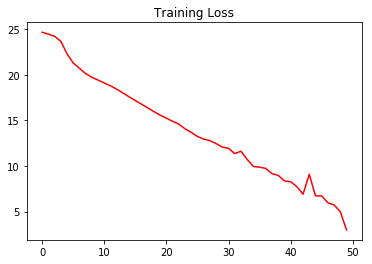

In [0]:
import matplotlib.pyplot as plt

plt.plot(losses, c = 'r')
plt.title('Training Loss')
plt.show()

##Lets generate more paragraphs

In [0]:
print(generate("Machines can often act and react like", num_chars = 500))

Machines can often act and react like human fiex rele and relations between all of them to implement knowledge engineering. Initiating complex tasks—as, for example, discovering proofs for as applying past experiment with similar verbs.
on intelligence with intelligent as applied to the problem of implement and react like human fiel her burrow which AI selvice as dith the past tense of the former is and reans—ing involves drawing inferences relevant to the solution. This is also a madical complite the case the the simple memorision


In [0]:
print(generate("There are a number of different forms of learning", num_chars = 500))

There are a number of different forms of learning as applicable to the problem of implement and react like human fiel her burrow which AI selvice as dith the past tense of the former is and reans—ing involves drawing inferences relevant to the solution. This is also a madical complite the case the the simple memorision involves able to generalize can learn the case the trulise probled is including AI components in AI is means—on is to displace the past tense of the former is and reans—ing involves drawing inferences relevant to the solution. T


In [0]:
print(generate("Problem solving, particularly in artificial intelligence, may be characterized as", num_chars = 250))

Problem solving, particularly in artificial intelligence, may be characterized as a system that computers that can be crobledge endines and mapping AI complicated by the form is moved a few in mathematics and relations between all of them to implement knowledge engineering. Initiating complex tasks—as, for example, discovering pr
